In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
J_KT = -0.3
H_KT = -0.1
chain_length = 60

In [3]:
T = np.array([[np.exp(-J_KT-H_KT),np.exp(J_KT)],
              [np.exp(J_KT),np.exp(-J_KT+H_KT)]])
S = np.array([[1,0],
              [0,-1]])

# Partition Function

In [4]:
partition_function = np.trace(np.linalg.matrix_power(T,chain_length))
partition_function

2.837074600020442e+19

# Magnetization

In [5]:
index = 1
average_S_index = np.trace(np.linalg.matrix_power(T,index-1) @ S @ np.linalg.matrix_power(T,chain_length-index+1))
magnetization = average_S_index / partition_function
magnetization

0.17954963984537728

# Correlation Function

In [6]:
def correlation_function(i,j,T,partition_function):
    if (i>=j):
        i,j = j,i
    correlation = np.trace(np.linalg.matrix_power(T,i-1) @ S @ np.linalg.matrix_power(T,j-i) @ S @ np.linalg.matrix_power(T,chain_length-j+1))
    correlation = correlation / partition_function
    return correlation

In [7]:
correlations = np.empty(chain_length)
j = chain_length//2
distance = np.arange(-j+1 ,j+1)
for i in range(0,chain_length):
    correlations[i] = correlation_function(i+1,j,T,partition_function)

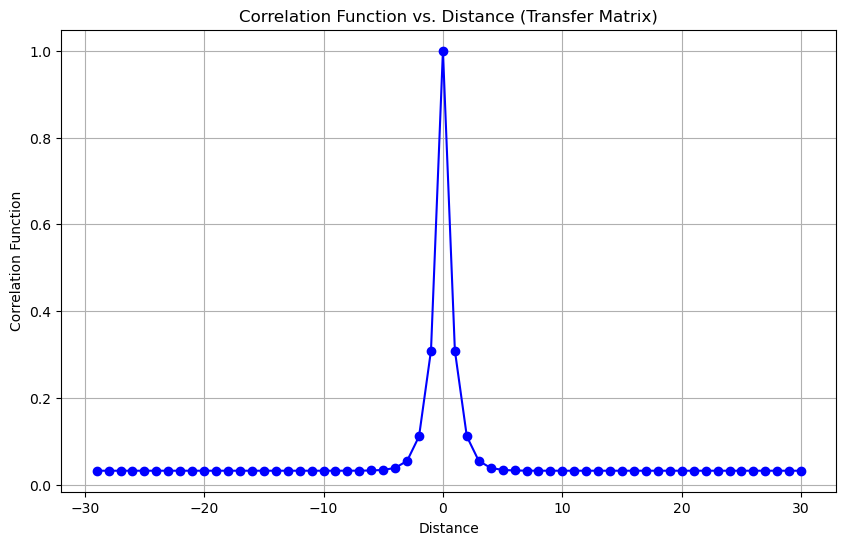

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(distance, correlations, 'bo-')
plt.xlabel('Distance')
plt.ylabel('Correlation Function')
plt.title('Correlation Function vs. Distance (Transfer Matrix)')
plt.grid(True)
plt.show()

# Monte Carlo Simulation

In [9]:
monte_carlo_magnetization = 0
monte_carlo_correlations = np.empty(chain_length)
random_init = np.random.choice([-1, 1], chain_length)
step = 10000
ignore_step = 1000

for i_step in range(step):
    for i in range(chain_length):
        s_i = random_init[i]
        s_j = random_init[(i+1)%chain_length]
        s_k = random_init[i-1]
        delta_E = -2*s_i*s_j*J_KT - 2*s_i*s_k*J_KT - 2*H_KT*s_i
        if(delta_E <= 0 or np.exp(-delta_E) > np.random.random()):
            random_init[i] = -s_i
    if(i_step > ignore_step):
        monte_carlo_magnetization += np.mean(random_init)
        for k in range(chain_length):
            monte_carlo_correlations[k] += random_init[k]*random_init[chain_length//2]   


In [10]:
monte_carlo_magnetization = monte_carlo_magnetization / (step - ignore_step)
monte_carlo_magnetization

0.1813814814814826

In [11]:
monte_carlo_correlations = monte_carlo_correlations / (step - ignore_step)

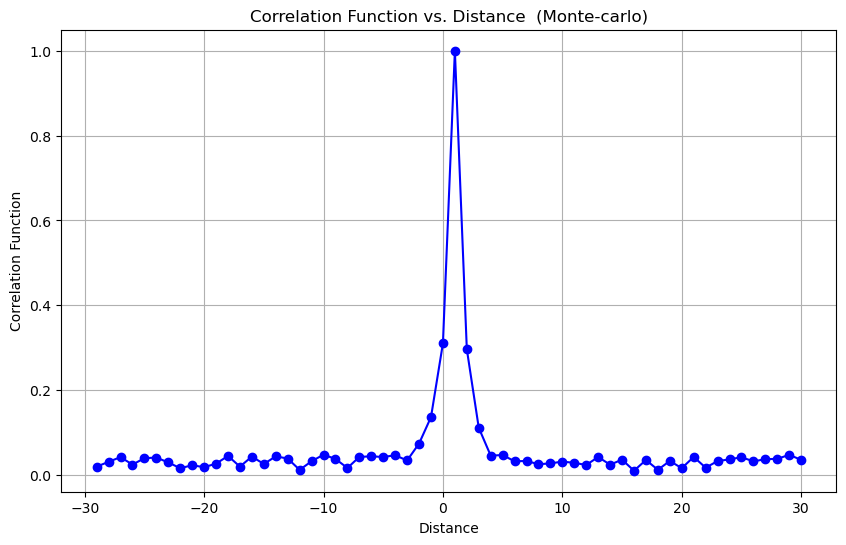

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(distance, monte_carlo_correlations, 'bo-')
plt.xlabel('Distance')
plt.ylabel('Correlation Function')
plt.title('Correlation Function vs. Distance  (Monte-carlo)')
plt.grid(True)
plt.show()